# Test The Code functionality

In [1]:
import sys
import os
import pandas as pd
# Add the src directory to the Python path

sys.path.append(os.path.abspath("../src"))

from hypothesis_testing import *

# Initialize the Class

In [2]:
eda = InsuranceEDA(filepath='../Data/MachineLearningRating_v3.txt', delimiter='|')

In [3]:
eda.validate_dates()

TransactionMonth: 0.00% missing after parsing.
VehicleIntroDate: 4.88% missing after parsing.


In [4]:
eda.add_date_parts()

#  Check Impact of Missing VehicleIntroDate

In [5]:
missing_intro = eda.df['VehicleIntroDate'].isna().mean()
print(f"Missing VehicleIntroDate: {missing_intro:.2%}")

Missing VehicleIntroDate: 4.88%


In [6]:
eda.df['VehicleIntroDateMissing'] = eda.df['VehicleIntroDate'].isna()

# Handle Missing Values

In [7]:
eda.handle_missing_values()

# Add Computed Metrics (ClaimFrequency, Margin, LossRatio, ClaimSeverity)

In [8]:
eda.add_metrics()

## preview the data

In [9]:
eda.df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,AccountType,MaritalStatus,...,TotalClaims,TransactionYear,TransactionQuarter,VehicleYear,VehicleMonth,VehicleIntroDateMissing,LossRatio,ClaimFrequency,ClaimSeverity,Margin
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,Current account,Not specified,...,0.0,2015,2015Q1,2002.0,6.0,False,0.0,False,NaN,21.929825
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,Current account,Not specified,...,0.0,2015,2015Q2,2002.0,6.0,False,0.0,False,NaN,21.929825
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,Current account,Not specified,...,0.0,2015,2015Q3,2002.0,6.0,False,NaN,False,NaN,0.000000
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,Current account,Not specified,...,0.0,2015,2015Q2,2002.0,6.0,False,0.0,False,NaN,512.848070
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,Current account,Not specified,...,0.0,2015,2015Q3,2002.0,6.0,False,NaN,False,NaN,0.000000


# Run All Hypothesis Tests

In [10]:
eda.hypothesis_tests()


Starting Hypothesis Testing...


ANOVA: LossRatio by Province
F-statistic = 4.9888, p-value = 0.0000
 Reject H₀ – No risk differences across provinces

ANOVA: LossRatio by PostalCode
F-statistic = 0.8042, p-value = 1.0000
 Fail to Reject H₀ – No risk differences between postal codes

ANOVA: Margin by PostalCode
F-statistic = 0.9078, p-value = 0.9730
 Fail to Reject H₀ – No significant margin difference between postal codes

T-test on LossRatio by Gender (Male vs Female)
t = -0.5986, p = 0.5495 → Fail to Reject H₀


# Summarize the Results in a Table

In [11]:
summary_df = eda.report_results()
summary_df


Summary of Hypothesis Test Results:


,Hypothesis,Metric,Group,p-value,Decision,Interpretation
0,No risk differences across provinces,LossRatio,Province (9 groups),0.0000,Reject H₀,There is a significant difference in lossratio...
1,No risk differences between postal codes,LossRatio,PostalCode (780 groups),1.0000,Fail to Reject H₀,There is a no significant difference in lossra...
2,No significant margin difference between posta...,Margin,PostalCode (835 groups),0.9730,Fail to Reject H₀,There is a no significant difference in margin...
3,No significant risk difference between Women a...,LossRatio,Male vs Female,0.5495,Fail to Reject H₀,There is a no significant difference in lossra...


# Optional: Visualize Distributions

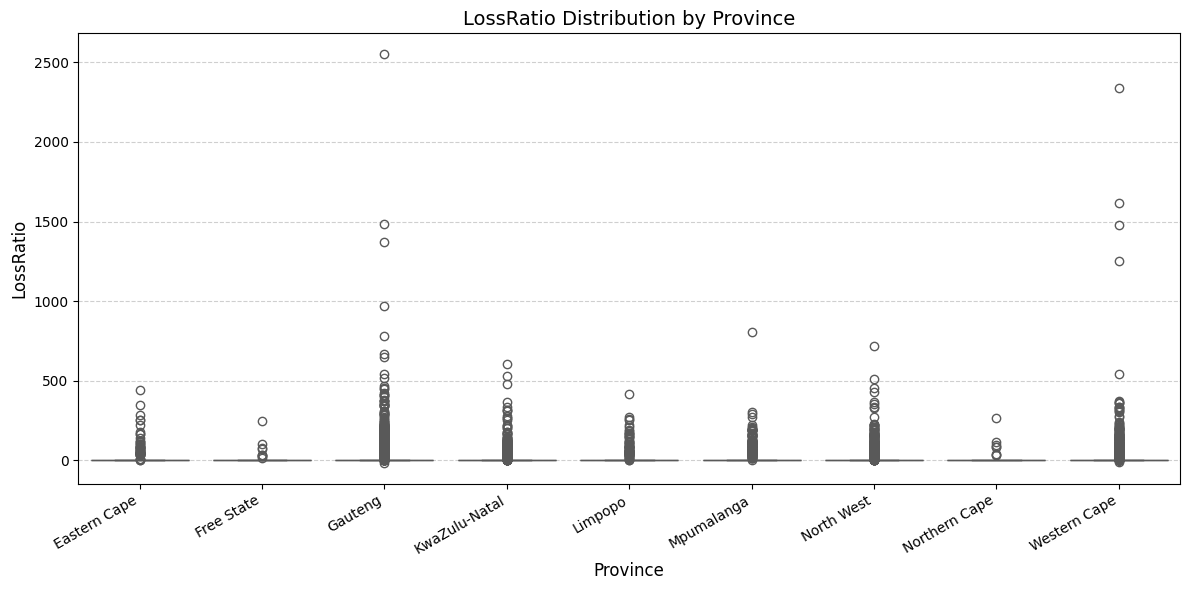

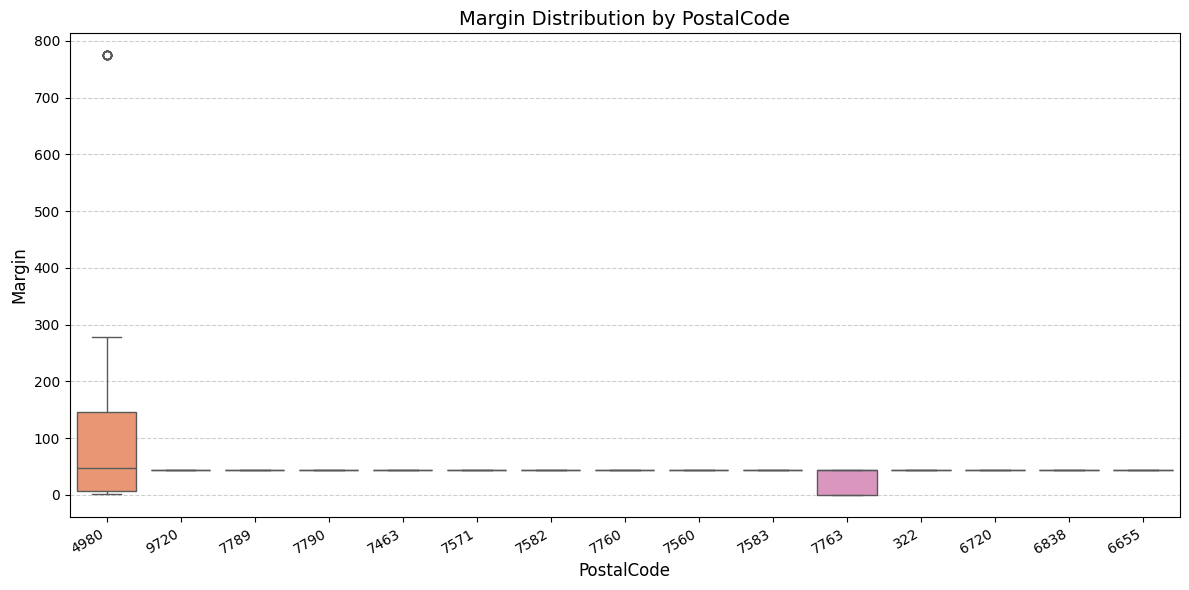

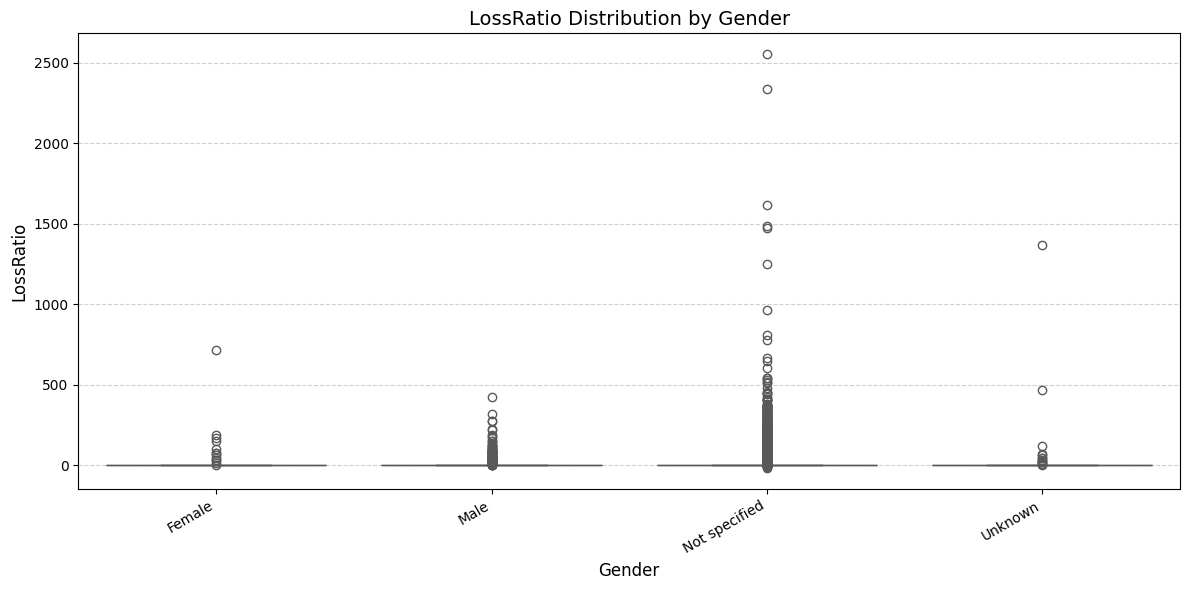

In [12]:
eda.visualize_boxplot('LossRatio', 'Province')
eda.visualize_boxplot('Margin', 'PostalCode', top_n=15)
eda.visualize_boxplot('LossRatio', 'Gender')